In [12]:
# Import libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [29]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/train'
test_path = 'Dataset/test'
val_path = 'Dataset/val'


In [14]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [15]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [17]:
# Getting number of output classes
folders = glob('Dataset/train/*')
folders

['Dataset/train/Parasitized', 'Dataset/train/Uninfected']

In [18]:

# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [19]:
# len(folders) is our output layer
# I am taking softmax and not sigmoid, because I am having two nodes, I could use sigmoid for one node.
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [21]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [22]:
# tell the model what cost and optimization method to use
# Note: Using 'categorical_crossentropy' beucase I have two nodes, for one node I could use 'binary_crossentropy'

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [23]:
# Use the Image Data Generator to import the images from the dataset
# Applying image augmentation in training data, to increase data set, with variations of the image.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3857 images belonging to 2 classes.


In [32]:

training_set

In [26]:
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 826 images belonging to 2 classes.


In [27]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/var/folders/8j/ph_r3mbs0pg4f3_12c0xgr8c0000gn/T/ipykernel_94195/916207031.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20


2023-04-27 02:27:31.458805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


121/121 [==============================] - ETA: 0s - loss: 0.6727 - accuracy: 0.7153

2023-04-27 02:36:51.033680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


121/121 [==============================] - 702s 6s/step - loss: 0.6727 - accuracy: 0.7153 - val_loss: 0.4528 - val_accuracy: 0.7990
Epoch 2/20
121/121 [==============================] - 858s 7s/step - loss: 0.3806 - accuracy: 0.8380 - val_loss: 0.3239 - val_accuracy: 0.8608
Epoch 3/20
121/121 [==============================] - 845s 7s/step - loss: 0.3294 - accuracy: 0.8569 - val_loss: 0.2908 - val_accuracy: 0.8729
Epoch 4/20
121/121 [==============================] - 828s 7s/step - loss: 0.3015 - accuracy: 0.8774 - val_loss: 0.2789 - val_accuracy: 0.8898
Epoch 5/20
121/121 [==============================] - 638s 5s/step - loss: 0.2459 - accuracy: 0.9064 - val_loss: 0.5161 - val_accuracy: 0.7785
Epoch 6/20
121/121 [==============================] - 577s 5s/step - loss: 0.2823 - accuracy: 0.8831 - val_loss: 0.2820 - val_accuracy: 0.8777
Epoch 7/20
121/121 [==============================] - 576s 5s/step - loss: 0.2269 - accuracy: 0.9111 - val_loss: 0.3945 - val_accuracy: 0.8354
Epoch 8/20

In [35]:
# Test dataset
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 828 images belonging to 2 classes.


In [53]:
class_names = list(training_set.class_indices.keys())
class_names

['Parasitized', 'Uninfected']

In [36]:
scores = model.evaluate(test_set)
scores

2023-04-27 10:42:40.187801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


26/26 [==============================] - 92s 4s/step - loss: 0.2735 - accuracy: 0.9070


[0.2735430896282196, 0.9070048332214355]

In [37]:
r.params

{'verbose': 1, 'epochs': 20, 'steps': 121}

In [38]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
loss = r.history['loss']
val_loss = r.history['val_loss']

accuracy = r.history['accuracy']
val_accuracy = r.history['val_accuracy']

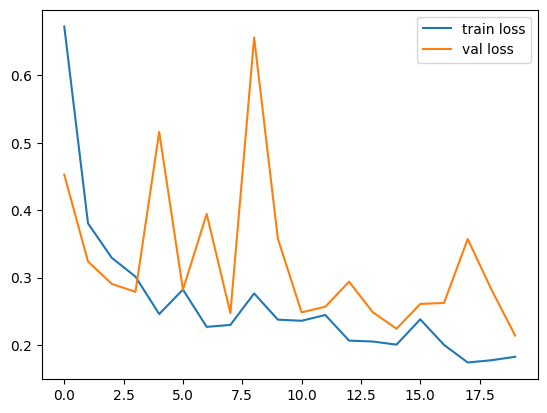

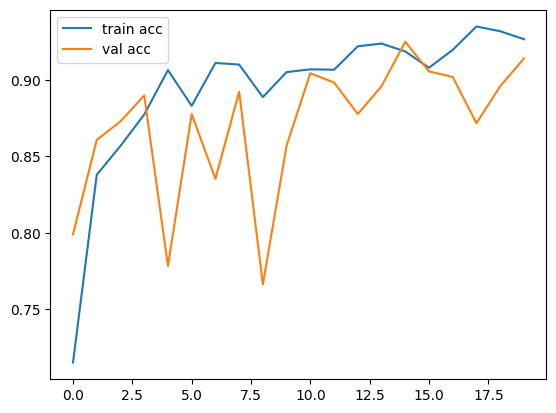

<Figure size 640x480 with 0 Axes>

In [40]:
# plot the loss
plt.plot(loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(accuracy, label='train acc')
plt.plot(val_accuracy, label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [57]:
# plt.figure(figsize=(15, 8))
# plt.subplot(1, 2, 1)
# plt.plot(range(50), accuracy, label='Training Accuracy')
# plt.plot(range(50), val_accuracy, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(range(50), loss, label='Training Loss')
# plt.plot(range(50), val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [59]:
CLASS_NAMES = ["Parasitized", "Uninfected"]

In [66]:
import tensorflow as tf
from PIL import Image

In [75]:
# def predict(model, img):
    
#     # converting images into array
# #     img_array = np.array(img.convert('RGB'))
#     img_array = tf.keras.preprocessing.image.img_to_array(img)
#     img_array = tf.expand_dims(img_array, 0)
  
#     # making the prediction
#     predictions = model.predict(img_array)
#     predicted_class = CLASS_NAMES[np.argmax(predictions[0])]

#     confidence = round(100 * (np.max(predictions[0])), 2)
#     return predicted_class, confidence



def predict(model, img):
    
    # converting images into array
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0)
  
    # making the prediction
    predictions = model.predict(img_array)
    predicted_class = CLASS_NAMES[np.argmax(predictions[0])]

    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 99ms/step


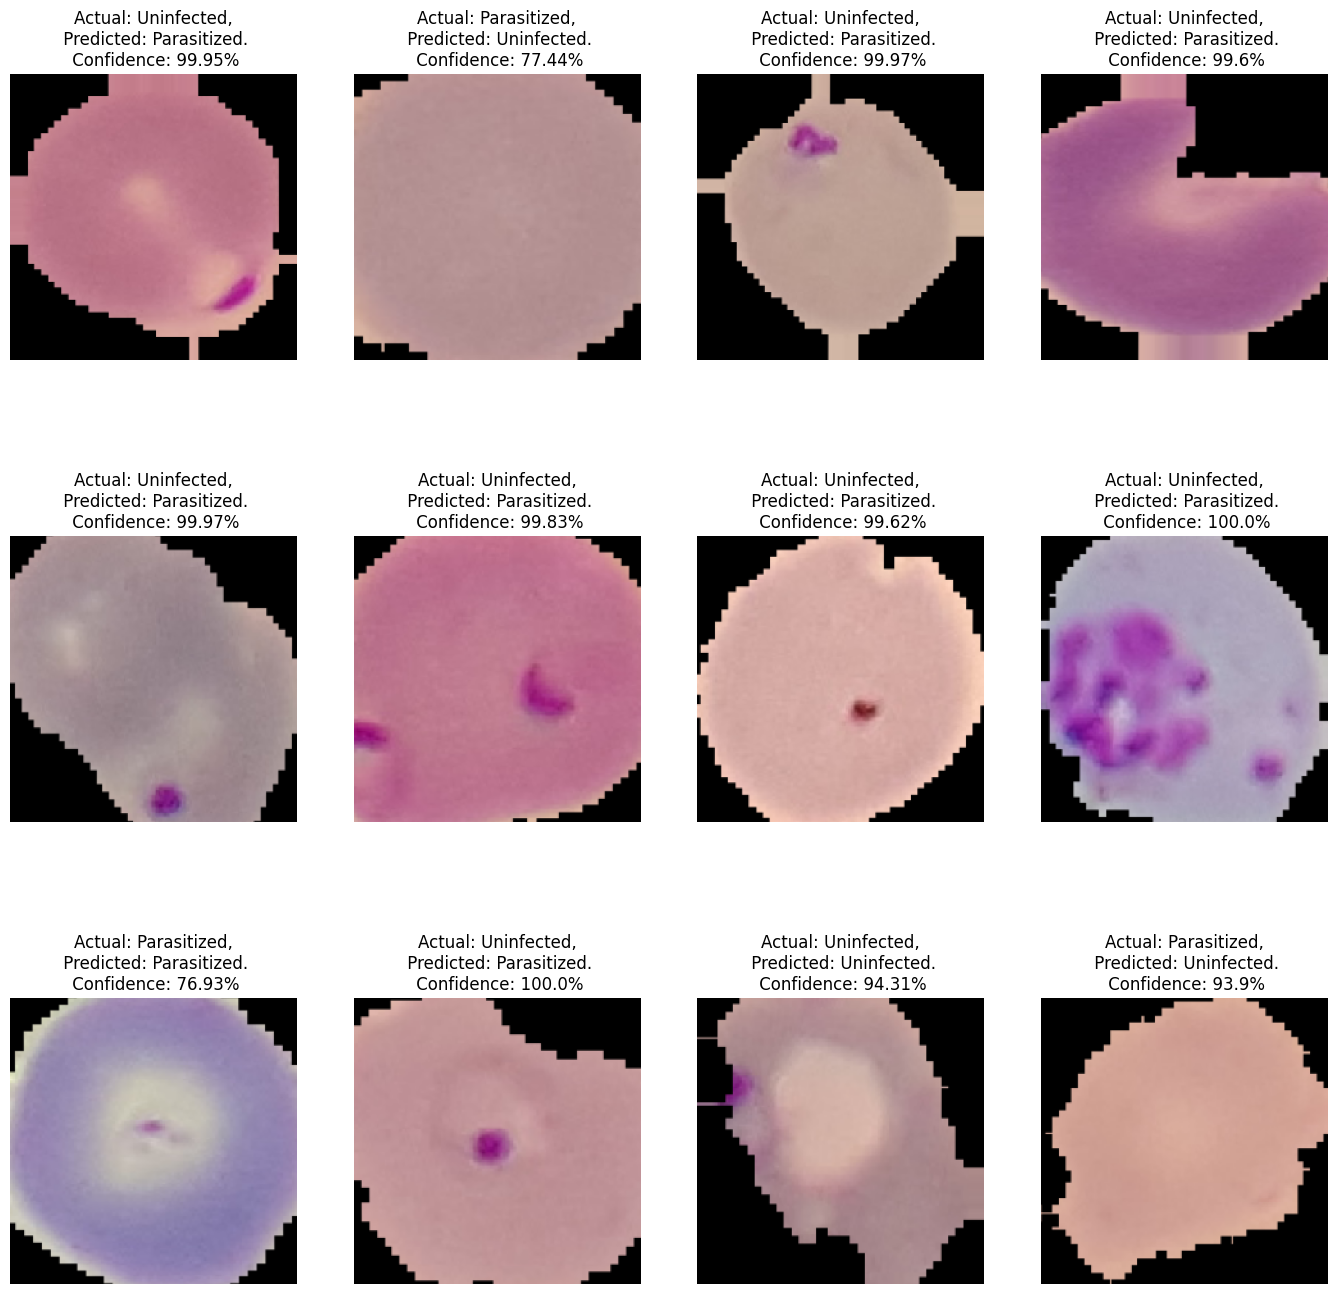

In [78]:
plt.figure(figsize=(17, 17))
counter =0
for images, labels in test_set:
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i][0])]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
        
        
    break

In [45]:
import os
[i for i in (os.listdir("saved_models") + [0])]
# int(float('5.0'))

[0]

In [46]:
os.listdir("saved_models")

[]

In [47]:
import os
model_version = max([int(i) for i in os.listdir("saved_models") if i != '.DS_Store'] + [0])+1
model_version

1

In [48]:
# Create new directory with model version
model_dir = os.path.join("saved_models", str(model_version))
os.makedirs(model_dir, exist_ok=True)

In [49]:
# Save model inside new directory
model.save(os.path.join(model_dir, "model_vgg19.h5"))

In [50]:

# save it as a h5 file


# from tensorflow.keras.models import load_model

# model.save('model_vgg19.h5')